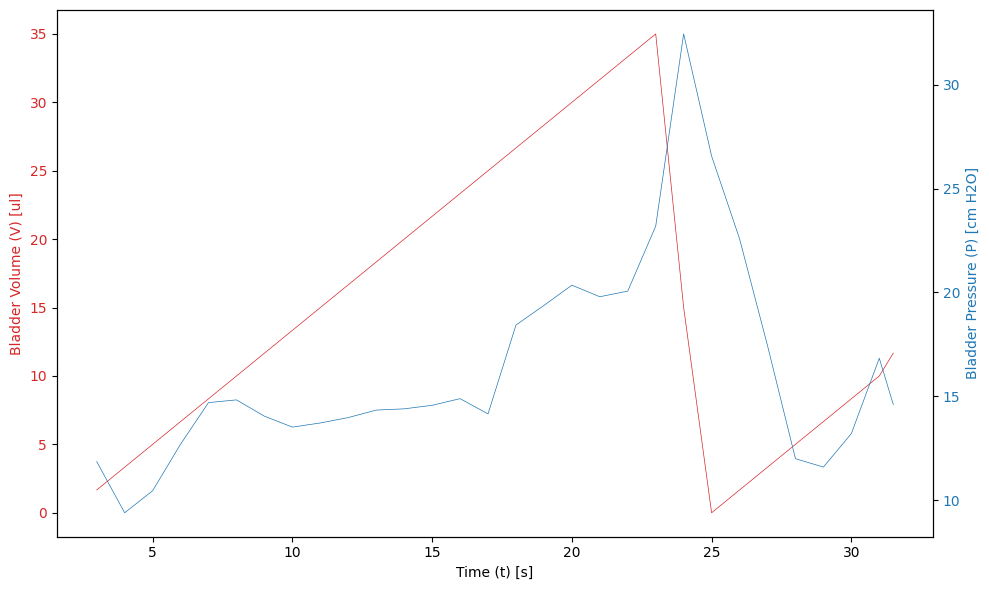

In [1]:
import pandas as pd
from utiles import volume_pressure_plot

bladder_volume = pd.read_csv('../output/bladder_volume.csv').to_numpy()
bladder_pressure = pd.read_csv('../output/bladder_pressure.csv').to_numpy()
feedback_times = pd.read_csv('../output/feedback_times.csv').to_numpy()

volume_pressure_plot(bladder_volume,bladder_pressure,feedback_times,save_fig=False,show_fig=True)

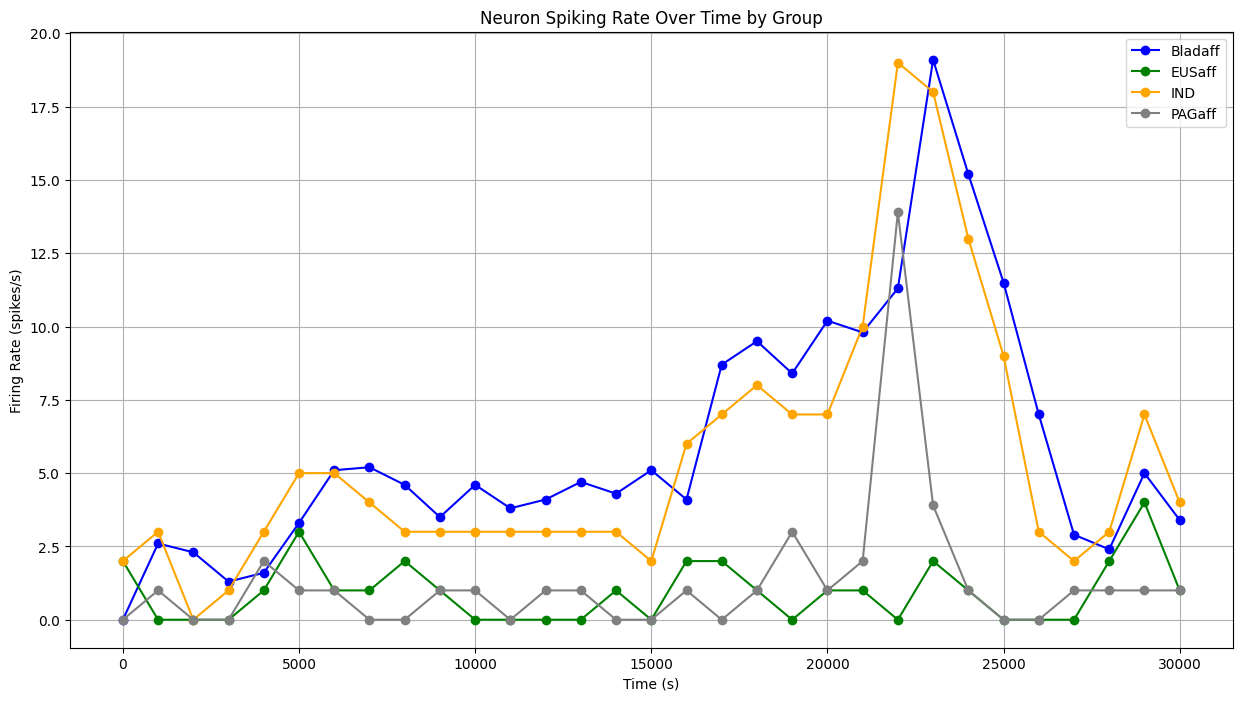

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sys
from utiles import plot_spiking_rate

# needed to get model_parameter.py visable in this folder
sys.path.append("..")
from model_parameters import model_settings
model = model_settings()

# Sample data loading from the HDF5 file
f = h5py.File('../output/spikes.h5', 'r')
df = pd.DataFrame({
    'node_ids': f['spikes']['LUT']['node_ids'][:], 
    'timestamps': f['spikes']['LUT']['timestamps'][:]
})

# Create a mapping from node_id to group name
node_id_to_group = {}
for group in model.node_set:
    for node_id in range(group['start'], group['end'] + 1):
        node_id_to_group[node_id] = group['name']

# Map node_ids to groups
df['group'] = df['node_ids'].map(node_id_to_group)

# Example: Specify which groups to include in the plot
included_groups = ["Bladaff", "PAGaff", "EUSaff", "IND"]

# Plot the spiking rate for the specified groups
plot_spiking_rate(df, model.node_set, included_groups,time_window_ms=1000)


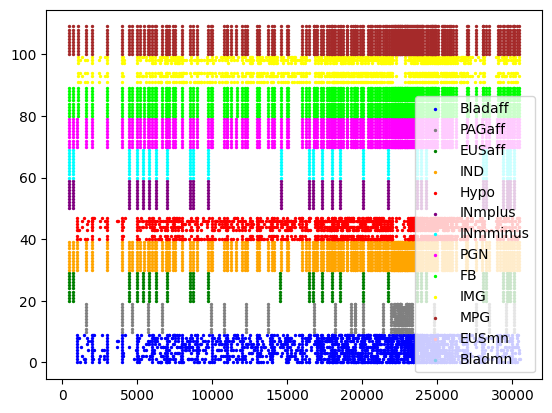

In [3]:
from utiles import raster
raster(df,model.node_set)